In [1]:
#Problems

"""
How univariate time series can be re-organized to fit in a neural network framework.
The differences between the standard feedforward neural network and an RNN.
The graph representation of an RNN
The data requirement for an RNN model
"""
# solution
"""
We will uses stock market data to help readers understand the property of serial connectivity. 
First, the stock price of today should be highly influenced by those of recent days. 
Second, the price of same day last year may still influence today’s price. 
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

['international-airline-passengers', 'stockprice-test', 'stockprice-train']


<a id="4"></a>
**Importing and Preprocessind Data**

<a id="5"></a>
**Loading Data:**

In [2]:
dataset_train = pd.read_csv('../input/stockprice-train/Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#open'ı kullanıcaz sadece:
train = dataset_train.loc[:, ['Open']].values #array'e çevirdik
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

<a id="6"></a>
**Feature Scaling:**

In [5]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

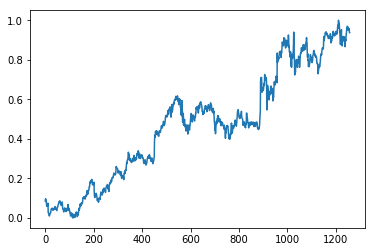

In [6]:
plt.plot(train_scaled)

<a id="7"></a>
**Create Data Structure:**

In [7]:
#ilk 1-50 yi alıp X_train'e, 51. data point'i de y_train'e,
#2-51'i alıp X_train'e, 52'yi y_train'e ...olacak şekilde data frame i oluşturuyoruz:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

<a id="8"></a>
**Reshape:**

In [8]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

<a id="9"></a>
**Create RNN Model**

In [9]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Using TensorFlow backend.


Epoch 1/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.4067
Epoch 2/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2268
Epoch 3/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.1891
Epoch 4/100
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1516
Epoch 5/100
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1142
Epoch 6/100
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0883
Epoch 7/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0824
Epoch 8/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0606
Epoch 9/100
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0600
Epoch 10/100
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0494
Epoch 11/100
1200/1200 [==============================] - 1s 1ms/step - loss: 0.0440
Epoch 12/100
1200/1200 [==============================] - 1s 1ms/step - lo

* Epochs artırılbilir
* Batch size değiştirilebilir
* Activation functionlar değiştirilebilir
* Layer sayısı artırılabilir

<a id="10"></a>
**Prediction and Visualization of RNN Model**

In [10]:
dataset_test = pd.read_csv('../input/stockprice-test/Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [11]:
real_stock_price = dataset_test.loc[:, ['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [12]:
#Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [13]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#inverse_transform ile, scale edildikten sonra predict edilen değerleri gerçek değer aralığına çekiyoruz

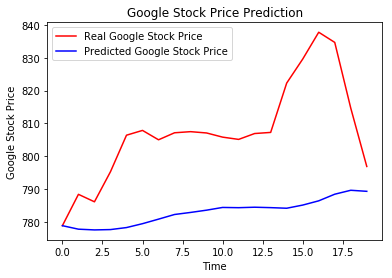

In [14]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<a id="13"></a>
**Loading Data**

In [15]:
data = pd.read_csv('../input/international-airline-passengers/international-airline-passengers.csv')
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


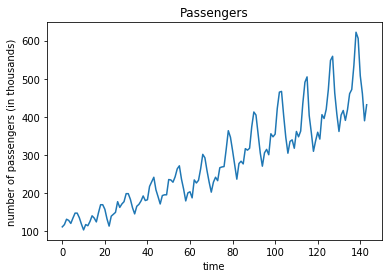

In [16]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

<a id="14"></a>
**Preprocessing Data**

<a id="15"></a>
**Reshape:**

In [17]:
dataset = dataset.reshape(-1,1) #(145, ) iken (145,1)e çevirdik
dataset = dataset.astype('float32')
dataset.shape

(145, 1)

<a id="16"></a>
**Scaling:**

In [18]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

<a id="17"></a>
**Train Test Split:**

In [19]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 72, test size: 73


In [20]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)

In [21]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)

In [22]:
trainX.shape

(61, 10)

In [23]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

In [24]:
trainX.shape

(61, 1, 10)

<a id="18"></a>
**Create LSTM Model**

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [26]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 1s 18ms/step - loss: 0.0114
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 12/50
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 13/50
61/61 [=============================

<a id="19"></a>
**Prediction**

In [27]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.48 RMSE
Test Score: 51.11 RMSE


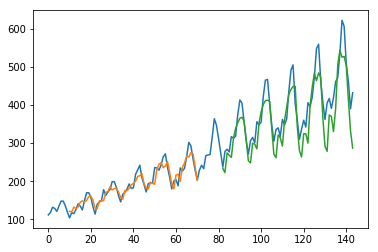

In [28]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()